Teste de estacionaridade - Teste ADF (Dickey-Fuller Aumentado):

In [1]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

In [3]:
#importando base de dados
df = pd.read_excel('/content/modelo_completo.xlsx',parse_dates=['data'],index_col='data')
print(df.head())

            acum_capital  cap_instalada  part_lucros  juros_capital  \
data                                                                  
2010-01-01     115.65129      -1.757602     1.147750     336.691318   
2010-02-01     111.86491      -1.903207     1.179053     314.866173   
2010-03-01     118.18266      -0.648799     1.192629     357.361058   
2010-04-01     121.96535      -0.094350     1.220305     316.924654   
2010-05-01     123.69591      -0.139825     1.197103     339.946447   

            div_capital  
data                     
2010-01-01        13.77  
2010-02-01        18.98  
2010-03-01         9.79  
2010-04-01        12.44  
2010-05-01        23.28  


In [4]:
#Função para executar o teste ADF e retornar os resultados de forma organizada
def adf_test(df, signif = 0.05): # Executa o teste dickey-fuller aumentado (adf) e imprime os resultados.
#Parâmetros:
#timeseries (pd.series): serie temporal a ser testada / signif(float): nivel de significância (padrão: 0.05)
    print(f'Teste ADF para: {df.name}')
    print('-' * 50)

In [5]:
#Executar teste ADF para cada coluna
for col in df.columns:
    result = adfuller(df[col],autolag='AIC')
    print(f'ADF Statistic for {col}: {result[0]}')
    print(f'p-value for {col}: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Extrair resultados
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Interpretar resultados
    print(f'\nInterpretation for {col}:')
    if p_value <= 0.05:
        print(f"Rejeite a hipótese nula. A série temporal'{col}' é estacionaria.")
    else:
        print(f"Não rejeitar a hipótese nula. A série temporal'{col}' é não estacionaria.")
    print('-' * 50)

ADF Statistic for acum_capital: -1.890612007181389
p-value for acum_capital: 0.3364903253853147
Critical Values:
	1%: -3.466398230774071
	5%: -2.8773796387256514
	10%: -2.575213838610586

Interpretation for acum_capital:
Não rejeitar a hipótese nula. A série temporal'acum_capital' é não estacionaria.
--------------------------------------------------
ADF Statistic for cap_instalada: -2.6752896733257314
p-value for cap_instalada: 0.07841270728222632
Critical Values:
	1%: -3.469413468959902
	5%: -2.8786964197028295
	10%: -2.5759166089965397

Interpretation for cap_instalada:
Não rejeitar a hipótese nula. A série temporal'cap_instalada' é não estacionaria.
--------------------------------------------------
ADF Statistic for part_lucros: -6.104645378063205
p-value for part_lucros: 9.650031289491909e-08
Critical Values:
	1%: -3.4662005731940853
	5%: -2.8772932777920364
	10%: -2.575167750182615

Interpretation for part_lucros:
Rejeite a hipótese nula. A série temporal'part_lucros' é estacion

Aplicando a primeira diferença nas variaveis não estacionarias

In [6]:
# Aplicar primeira diferença nas variáveis não estacionárias
df['acum_capital_diff'] = df['acum_capital'].diff()
df['cap_instalada_diff'] = df['cap_instalada'].diff()
df['juros_capital_diff'] = df['juros_capital'].diff()

In [7]:
#Teste de estacionariedade das series diferenciadas
print('Testes de Estacionariedade após diferenciação:')
print('-' * 50)
stationary_vars = []

for var in ['acum_capital_diff', 'cap_instalada_diff', 'juros_capital_diff']:
  is_stationary = adf_test(df[var].dropna())
  if is_stationary:
    stationary_vars.append(var)

Testes de Estacionariedade após diferenciação:
--------------------------------------------------
Teste ADF para: acum_capital_diff
--------------------------------------------------
Teste ADF para: cap_instalada_diff
--------------------------------------------------
Teste ADF para: juros_capital_diff
--------------------------------------------------


In [8]:
#Definindo função para criar os gráficos
def plot_series_comparison(original_series, differenced_series, title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    ax1.plot(original_series, label='Original', color='blue')
    ax1.set_title(f'{title} (Original)')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.plot(differenced_series, label='Differenced', color='red')
    ax2.set_title(f'{title} (Differenced)')
    ax2.set_ylabel('Value')
    ax2.set_xlabel('Time')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


COMPARAÇÃO VISUAL DAS SÉRIES: 


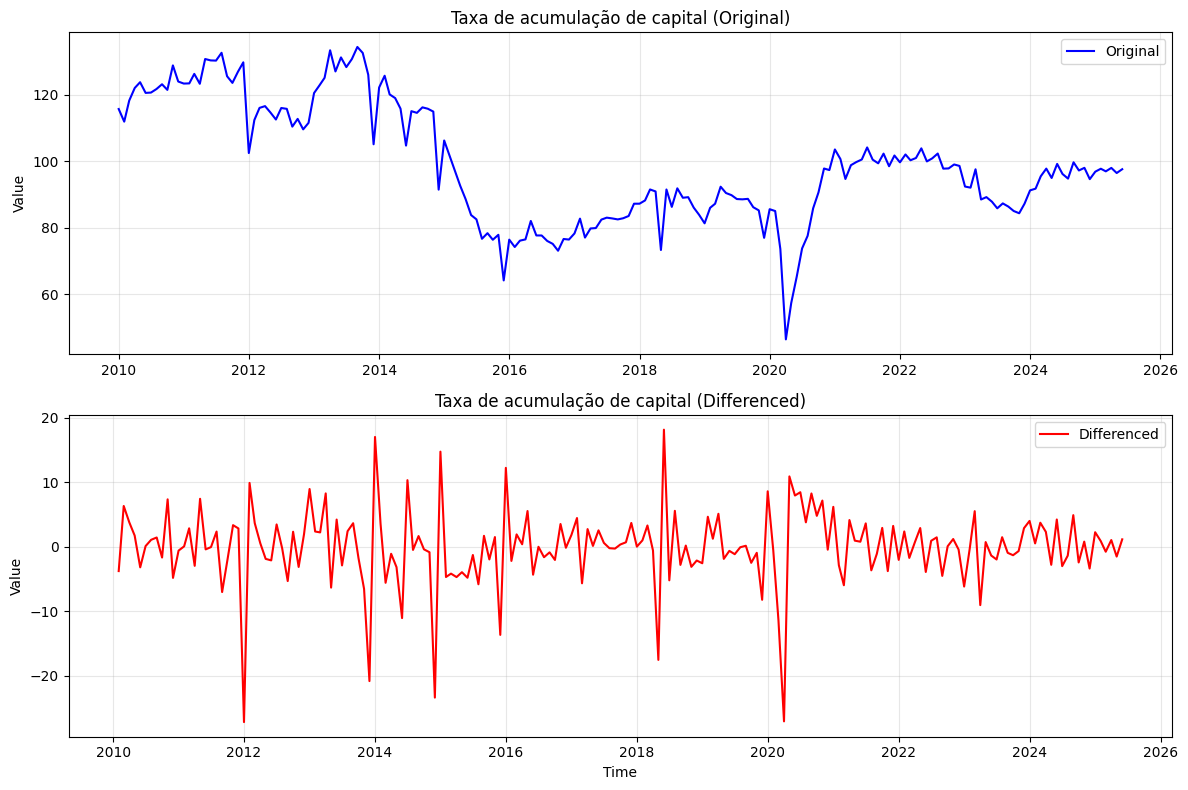

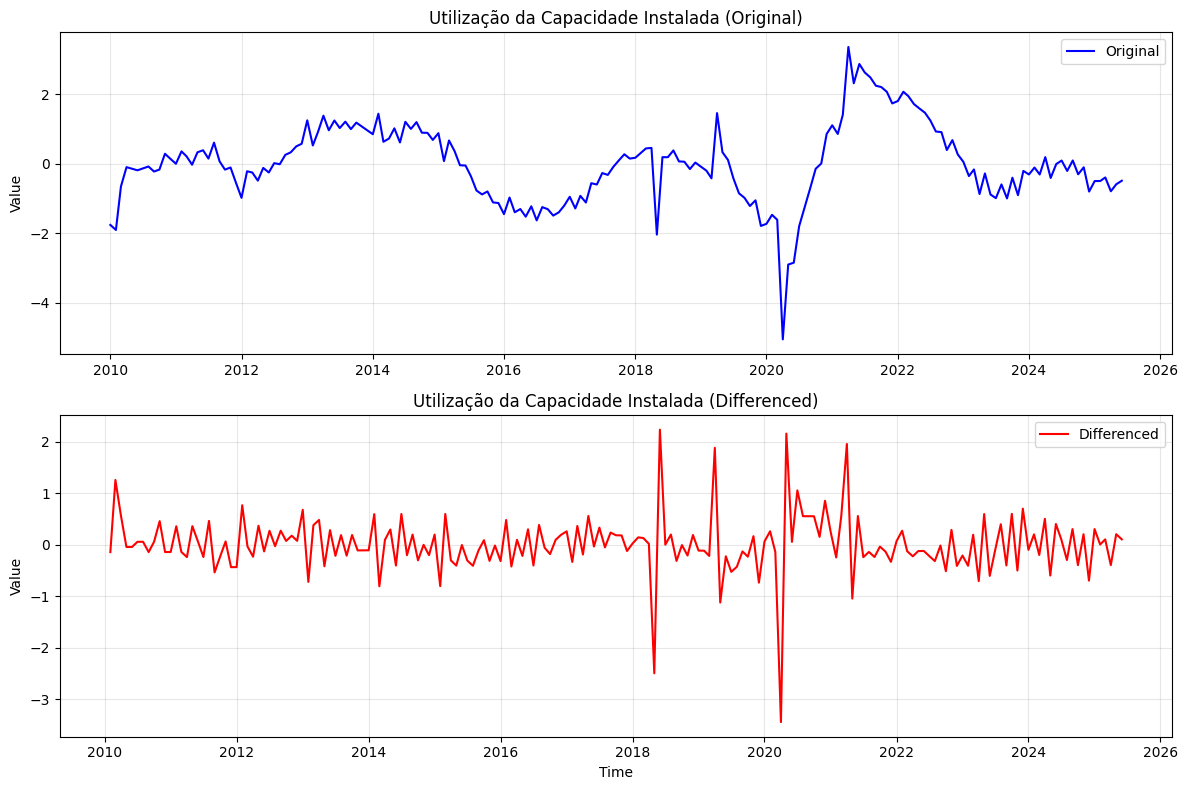

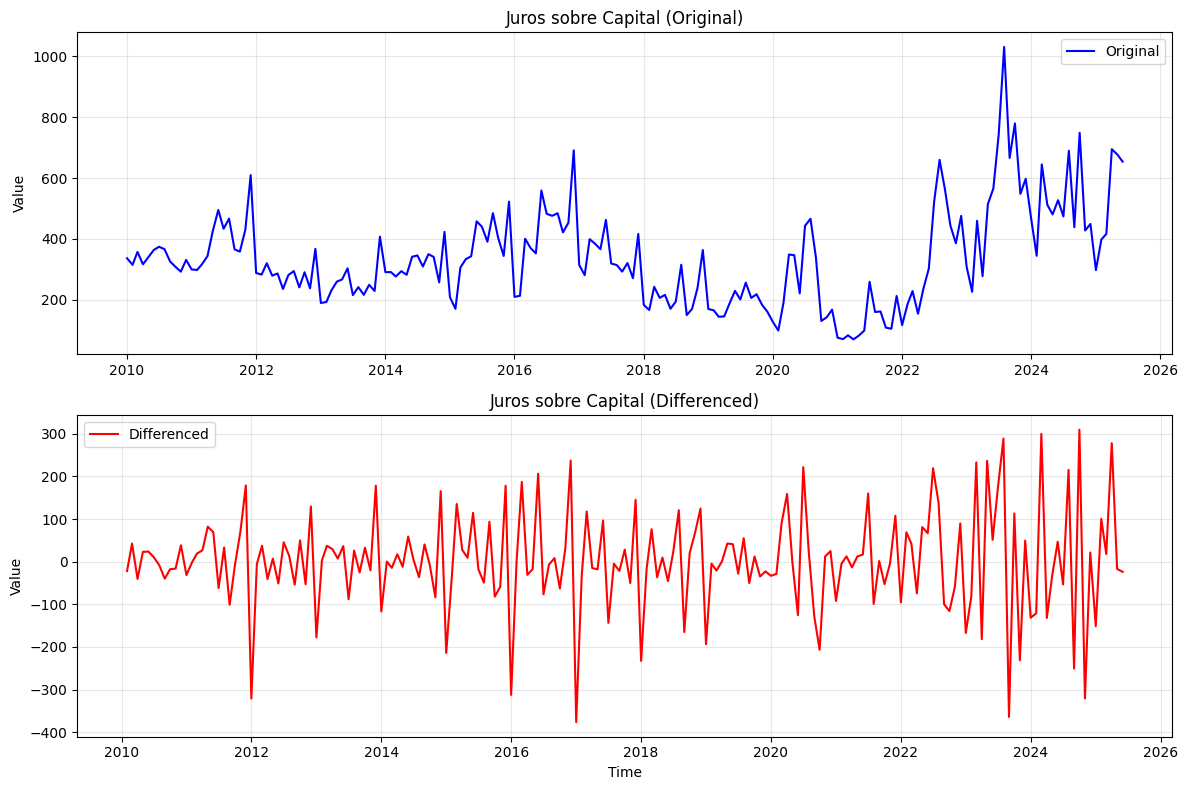

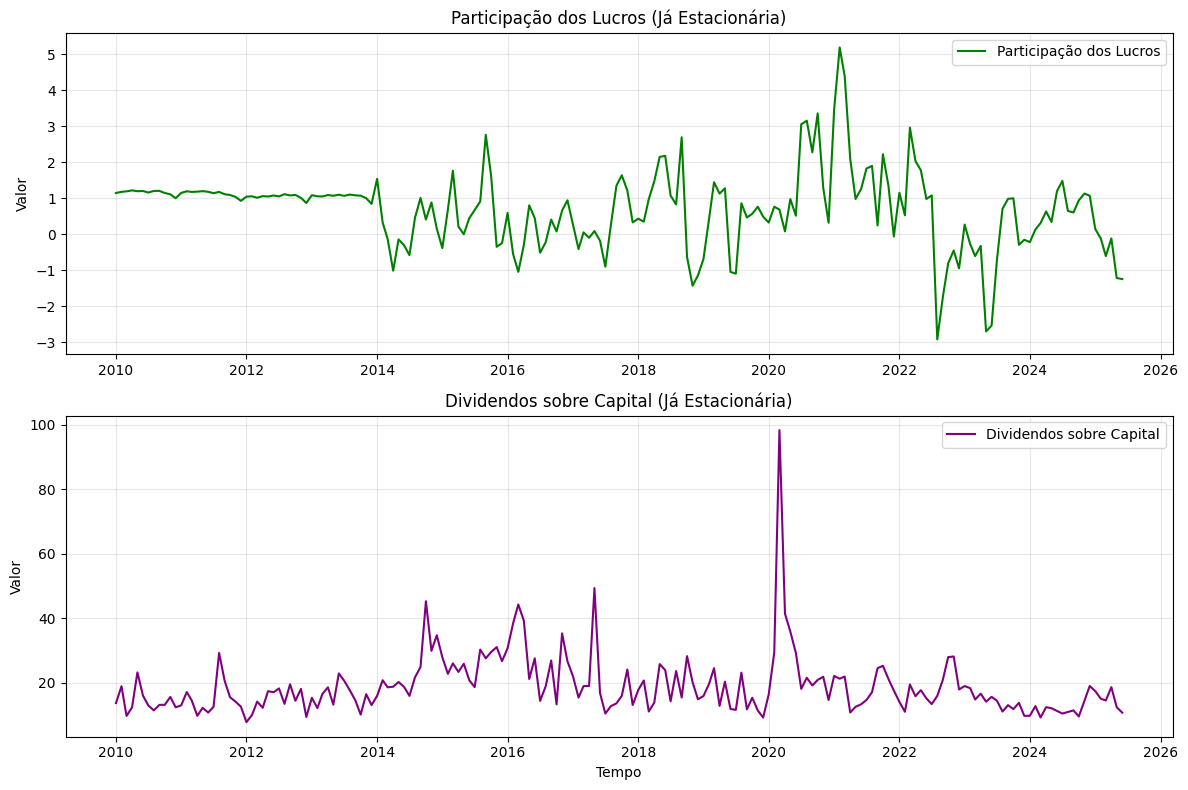

In [9]:
#Plotar comparações para as variaveis não estacionarias originais
print('\nCOMPARAÇÃO VISUAL DAS SÉRIES: ')
print('='*60)
#Para acum_capital
plot_series_comparison(df['acum_capital'],
                       df['acum_capital_diff'],
                       'Taxa de acumulação de capital')
# Para cap_instalada
plot_series_comparison(
    df['cap_instalada'],
    df['cap_instalada_diff'],
    'Utilização da Capacidade Instalada')

# Para juros_capital
plot_series_comparison(
    df['juros_capital'],
    df['juros_capital_diff'],
    'Juros sobre Capital')

# Também plotar as variáveis que já eram estacionárias
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# part_lucros
ax1.plot(df['part_lucros'], label='Participação dos Lucros', color='green')
ax1.set_title('Participação dos Lucros (Já Estacionária)')
ax1.set_ylabel('Valor')
ax1.legend()
ax1.grid(True, alpha=0.3)

# div_capital
ax2.plot(df['div_capital'], label='Dividendos sobre Capital', color='purple')
ax2.set_title('Dividendos sobre Capital (Já Estacionária)')
ax2.set_ylabel('Valor')
ax2.set_xlabel('Tempo')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Aplicando o teste ADF novamente

In [10]:
#Lista com todas a variaveis para testar novamente
all_columns = ['acum_capital', 'cap_instalada', 'juros_capital', 'part_lucros', 'div_capital', 'acum_capital_diff', 'cap_instalada_diff', 'juros_capital_diff']

In [11]:
#Reexecutar teste ADF para todas as variaveis
for col in all_columns:
  series_data = df[col].dropna()
  result = adfuller(series_data, autolag='AIC')
  print(f'ADF Statistic for {col}: {result[0]}')
  print(f'p-value for {col}: {result[1]}')
  print('Critical Values:')
  for key, value in result[4].items():
    print(f'\t{key}: {value}')
    #Extrair resultados
    adf_statistic = result[0]
  p_value = result[1]
  critical_values = result[4]
  #Interpretar resultados
  print(f'\nInterpretation for {col}:')
  if p_value <= 0.05:
    print(f"Rejeite a hipótese nula. A série temporal'{col}' é estacionaria.")
  else:
    print(f"Não rejeitar a hipótese nula. A série temporal'{col}' é não estacionaria.")
  print('-' * 50)

ADF Statistic for acum_capital: -1.890612007181389
p-value for acum_capital: 0.3364903253853147
Critical Values:
	1%: -3.466398230774071
	5%: -2.8773796387256514
	10%: -2.575213838610586

Interpretation for acum_capital:
Não rejeitar a hipótese nula. A série temporal'acum_capital' é não estacionaria.
--------------------------------------------------
ADF Statistic for cap_instalada: -2.6752896733257314
p-value for cap_instalada: 0.07841270728222632
Critical Values:
	1%: -3.469413468959902
	5%: -2.8786964197028295
	10%: -2.5759166089965397

Interpretation for cap_instalada:
Não rejeitar a hipótese nula. A série temporal'cap_instalada' é não estacionaria.
--------------------------------------------------
ADF Statistic for juros_capital: -1.4796871542533563
p-value for juros_capital: 0.5435348176503801
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705

Interpretation for juros_capital:
Não rejeitar a hipótese nula. A série temporal'juros_capital' 

Salvar um novo data frame com os resultados

In [15]:
# Definir o nome do arquivo em Excel
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
filename = f"dados_estacionarios_{timestamp}.xlsx"

stationary_df = pd.DataFrame({
    'acum_capital_diff': df['acum_capital_diff'],
    'cap_instalada_diff': df['cap_instalada_diff'],
    'juros_capital_diff': df['juros_capital_diff'],
    'part_lucros': df['part_lucros'],
    'div_capital': df['div_capital']
})
# Remover linhas com valores NaN (resultado da diferenciação)
stationary_df = stationary_df.dropna()

# Adicionar coluna de data se necessário (assumindo que o índice é temporal)
if isinstance(stationary_df.index, pd.DatetimeIndex):
    stationary_df['data'] = stationary_df.index
else:
    # Se não tiver índice temporal, criar uma coluna de data sequencial
    start_date = '2010-01-01'  # Ajuste conforme necessário
    dates = pd.date_range(start=start_date, periods=len(stationary_df), freq='M')
    stationary_df['data'] = dates
# Reordenar colunas para ter a data primeiro
cols = ['data'] + [col for col in stationary_df.columns if col != 'data']
stationary_df = stationary_df[cols]
# Salvar como Excel
excel_filename = f"dados_estacionarios_{timestamp}.xlsx"
stationary_df.to_excel(excel_filename, index=False)
print(f"DataFrame salvo também como Excel: {excel_filename}")

DataFrame salvo também como Excel: dados_estacionarios_20250906_232742.xlsx
